In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Detectron2'yi Colab'a Yükleme**


In [2]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 6.8 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=9186f9ba709679c41aa5d0bfa7b1fe12adefeb8c66552840daf6e5adeb0199e1
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 15 kB/s 
     |████████████████████████████████| 17.3 MB 58.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:

In [3]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# After this step it will ask you to restart the runtime, please do it.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 6.6 MB/s 
     |████████████████████████████████| 50 kB 3.8 MB/s 
     |████████████████████████████████| 79 kB 5.7 MB/s 
     |████████████████████████████████| 151 kB 48.9 MB/s 
     |████████████████████████████████| 130 kB 69.2 MB/s 
     |████████████████████████████████| 749 kB 31.4 MB/s 
     |████████████████████████████████| 843 kB 41.5 MB/s 
     |████████████████████████████████| 117 kB 63.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=9ab603ec644f614c24b8a10a7110d2829d0d6ebd7cb061cea5a24ae3eb6d7bae
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9

In [5]:
import torch
assert torch.__version__.startswith("1.8") 
import torchvision
import cv2
import os
import numpy as np
import json
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2 import model_zoo
from matplotlib.patches import Rectangle
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from visualizer import Visualizer
from colormap import random_color
from detectron2.data import MetadataCatalog
import cv2
from google.colab.patches import cv2_imshow

###**Resim Testi**

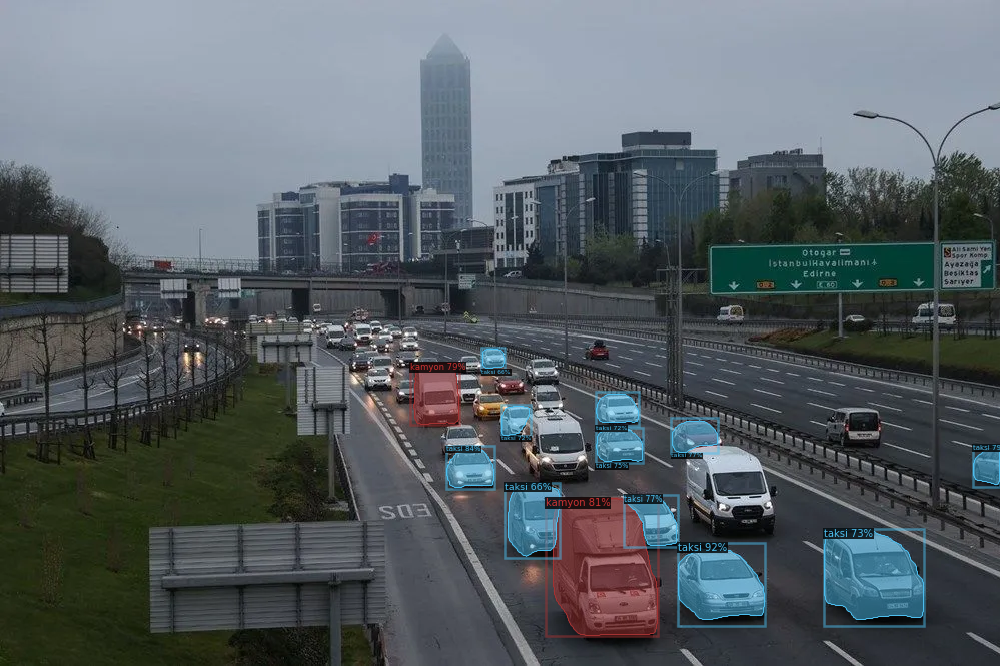

In [8]:
weights_path ="/content/drive/MyDrive/maskrcnn/model_final.pth"


cfg= get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_train",) 
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2 
cfg.SOLVER.IMS_PER_BATCH = 2 
cfg.SOLVER.BASE_LR = 0.001 
cfg.SOLVER.GAMMA = 0.05 
cfg.SOLVER.STEPS = [500] 
cfg.TEST.EVAL_PERIOD = 200 
cfg.SOLVER.MAX_ITER = 2000 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.MODEL.WEIGHTS = weights_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.65
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes=['taksi','kamyon','otobüs','motorsiklet']

from detectron2.utils.visualizer import ColorMode
import glob
from google.colab.patches import cv2_imshow
for imageName in glob.glob('2.jpg'):
  im = cv2.imread(imageName)
  #cv2.line(im,(300,550),(800,550),(0,0,255),10)
  predictor = DefaultPredictor(cfg)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  
  
  cv2_imshow(out.get_image()[:, :, ::-1])

###**Video Testi**

In [9]:

a=0

weights_path ="/content/drive/MyDrive/maskrcnn/model_final.pth"
video_path = "/content/drive/MyDrive/V.mp4"

cfg= get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_train",) 
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2 
cfg.SOLVER.IMS_PER_BATCH = 2 
cfg.SOLVER.BASE_LR = 0.001 
cfg.SOLVER.GAMMA = 0.05 
cfg.SOLVER.STEPS = [500] 
cfg.TEST.EVAL_PERIOD = 200 
cfg.SOLVER.MAX_ITER = 2000 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.MODEL.WEIGHTS = weights_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.65
#test_dataset_dicts = get_data_dicts(data_path+'train', classes)

MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes=['taksi','kamyon','otobüs','motorsiklet']
video_capture = cv2.VideoCapture(video_path)
width, height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)),int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fbs = video_capture.get(cv2.CAP_PROP_FPS)

video_writer = cv2.VideoWriter("/content/drive/MyDrive/maskrcnn/output.mp4", cv2.VideoWriter_fourcc(*'XVID'),fbs,(width, height))


while video_capture.isOpened():
  ret, im =video_capture.read()
  cv2.line(im,(675,520),(1200,520),(0,0,250),1)
  if not ret:
    break
  else:
    predictor = DefaultPredictor(cfg)
    outputs = predictor(im)
    cls_ids = outputs["instances"].pred_classes.cpu().numpy()
    #print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
    v = Visualizer(im[:, :, ::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
    
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    cv2.line(v.get_image()[:, :, ::-1],(675,520),(2000,520),(0,0,250),3)
    video_writer.write(v.get_image()[:, :, ::-1])
    
    if a==3:
      #cv2.rectangle(v.get_image()[:, :, ::-1], (0, 128), (2, 172), (0, 255, 0, 255), 2)
      #cv2.line(v.get_image()[:, :, ::-1],(300,550),(800,550),(0,0,255),10)
      cv2_imshow(v.get_image()[:, :, ::-1])
      resim=v.get_image()[:, :, :: -1]
      #genislik = resim.shape[1]
      #print (yükseklik," ",genislik)
     
     
     
      a=0
    a=a+1
    key=cv2.waitKey(1)
    if key== ord("q"):
      break
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.